<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/model%2Fdecision-tree/PregRed_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model - Decision Tree


In [59]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [60]:
# reading the data
data = pd.read_csv('/content/PregRed-Cleaned.csv')

In [61]:
# shape of the data
data.shape

(2028, 14)

In [62]:
# first 5 rows of data
data.head()

,'Blood Sugar',Haemoglobin,Subfertility=1,Height,Age,BMI,Cardiac Diseases=1',Gravidity,Consanguinity=1,Rubella Immunization=1',Had Folic Acid=1',Thyroid Diseases=1','Blood Pressure','Is the newborn healthy?'
0,0.649425,0.038156,0,0.732719,0.5000,0.400000,0,0.333333,0,0,0,0,0.000000,1
1,0.295977,0.031797,0,0.824885,0.0000,0.371689,0,0.000000,0,1,0,0,0.000000,1
2,0.390805,0.022258,0,0.769585,0.3125,0.247761,0,0.166667,0,1,1,0,0.000000,1
3,0.420484,0.034778,0,0.769585,0.6250,0.250746,0,0.166667,0,1,1,0,0.666667,0
4,0.390805,0.019873,0,0.760369,0.5000,0.250746,0,0.166667,0,1,1,0,0.000000,1


In [63]:
# checking missing values
data.isnull().sum()

'Blood Sugar'                0
Haemoglobin                  0
Subfertility=1               0
Height                       0
Age                          0
BMI                          0
Cardiac Diseases=1'          0
Gravidity                    0
Consanguinity=1              0
Rubella Immunization=1'      0
Had Folic Acid=1'            0
Thyroid Diseases=1'          0
'Blood Pressure'             0
'Is the newborn healthy?'    0
dtype: int64

In [64]:
# seperating independent and dependent vairable
y = data['\'Is the newborn healthy?\'']
x = data.drop(["'Is the newborn healthy?'"], axis=1)

In [65]:
# importing train test split to create validation set
from sklearn.model_selection import train_test_split

In [66]:
# creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state=101,stratify=y, test_size=0.2)

In [67]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.644266
0    0.355734
Name: 'Is the newborn healthy?', dtype: float64

In [68]:
# distribution in the validation set
y_valid.value_counts(normalize=True)

1    0.642857
0    0.357143
Name: 'Is the newborn healthy?', dtype: float64

In [69]:
# shape of training set
X_train.shape, y_train.shape

((1622, 13), (1622,))

In [70]:
# shape of validation set
X_valid.shape, y_valid.shape

((406, 13), (406,))

In [71]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
# creating decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [73]:
# fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [74]:
# checking the training score
dt_model.score(X_train, y_train)

1.0

In [75]:
# checking validation score
dt_model.score(X_valid, y_valid)

0.7931034482758621

In [76]:
# prediction on validation set
dt_model.predict(X_valid)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [77]:
# predicting validation probabilty
dt_model.predict_proba(X_valid)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [78]:
# changing threshold to improve the accurcy
from sklearn.metrics import accuracy_score

y_pred = dt_model.predict_proba(X_valid)[:,1]

new_y = []

for i in range(len(y_pred)):
  if y_pred[i] < 0.6:
    new_y.append(0)
  else: 
    new_y.append(1)

accuracy_score(y_valid, new_y)

0.7931034482758621

In [79]:
# finding the max_depth

train_accuracy = []
validation_accuracy = []

for depth in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  validation_accuracy.append(dt_model.score(X_valid, y_valid))

frame = pd.DataFrame({'max_depth': range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.644266,0.642857
1,2,0.730580,0.716749
2,3,0.741060,0.692118
3,4,0.757707,0.706897
4,5,0.766338,0.704433


No handles with labels found to put in legend.


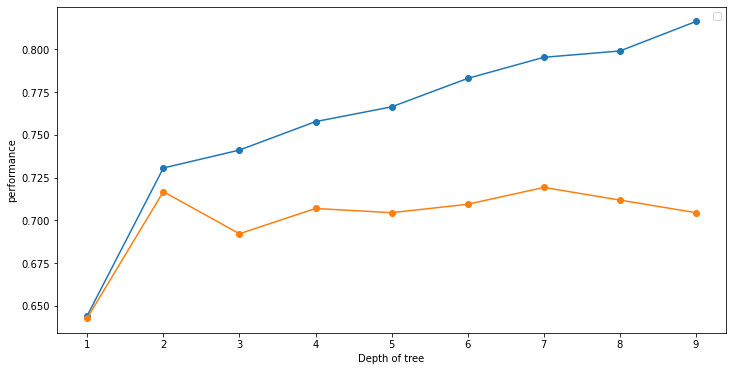

In [80]:
# plotting the accuracy

plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [81]:
dt_model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 25 , random_state=10)

In [82]:
# fitting model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [83]:
# checking score
dt_model.score(X_train, y_train)

0.7848335388409371

In [84]:
dt_model.score(X_valid, y_valid)

0.7167487684729064

In [85]:
from sklearn import tree

In [86]:
!pip install graphviz

In [87]:
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=4, filled=True)

In [88]:
!dot -Tpng tree.dot -o tree.png

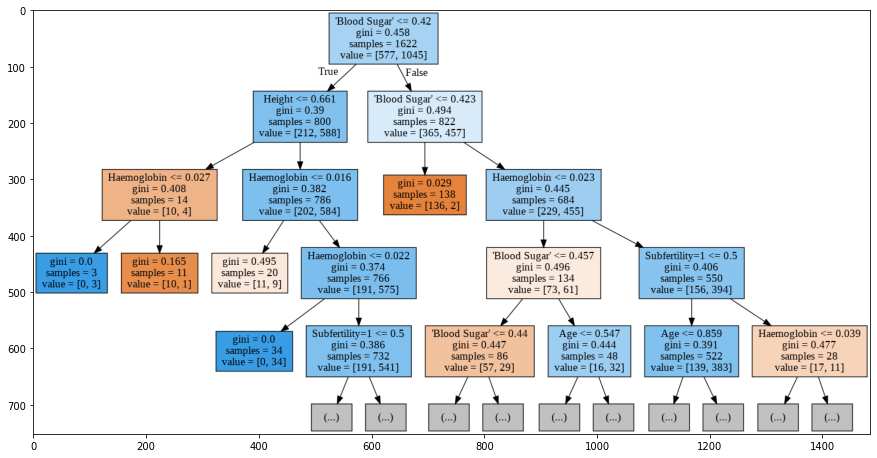

In [89]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)